Meu arquivo de dados, baixado pelo Github, está em:
G:\developer\GitHub\agendamento-hospitalar\dados\A151346189_28_143_208.csv

A página original é esta aqui: 
https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

A informação são os dados de internação do SUS, de 2008 em diante, por Unidade da Federação.

Para abrir o arquivo vamos usar o pandas

In [ ]:
import pandas as pd

Vou importar o arquivo de texto e fazer o upload para a VM do Colab e, para abrir o arquivo, faço referência ao arquivo local no Colab (clique no botão direito para ver o caminho).

Erros:
1) O padrão de formato do pandas é UTF8, mas o do governo do Brasil não é... Alterar o enconding.
2) Problema ao tokenizar... erro de separador.
3) Problema ao tokenizar... Primeiras linhas não são dados. Devemos pular.
A partir disso não dá mais erro, só que as últimas linhas ficam com "lixo".
4) Para tirar isso, usamos skipfooter (=12 para tirar as últimas 12 linhas) 

In [3]:
dados = pd.read_csv("/content/A151346189_28_143_208.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
dados.head()
dados.tail()



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30","53637713,13","53699506,08","58730379,58","57629317,06","58779088,02","63366430,89","62200230,97","61683824,68","62495363,90","64614271,83","66457445,34","66425009,36","65782428,73","63714541,87","64488493,88","66304168,50","61527419,52","62490522,38","66814413,40","67900518,35","64799726,75","68518232,07","68731297,03","66174969,16","66891309,48","67456434,73","67096302,52","60754144,32","58884339,85","66205364,40",...,"89585823,81","96174533,70","92176170,61","94228360,83","90655015,78","91242720,70","82934746,93","88817066,36","80572288,45","87419899,25","89396935,52","88148251,61","90754504,49","89093690,14","94010888,97","93664724,68","90025945,36","93081292,31","89050712,34","89664703,23","89259306,50","85585754,75","95152786,47","94163838,23","92237333,46","102298314,76","100260145,30","95917106,56","102331615,05","93971904,79","90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86051002,13","100531035,83","101374341,51","11958647088,33"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05","9547923,55","9450010,19","8365709,79","10033643,71","10746263,10","10849523,03","10902848,13","11991649,26","12050259,66","12174950,98","11178470,01","11997775,92","11686533,15","10756188,43","10565385,71","12148432,58","11270972,80","11947693,50","11435565,54","12392541,52","12441459,98","12025317,84","12353546,78","12381792,58","12340247,31","12467693,91","12356930,32","11209008,55","9656677,02","13698836,79",...,"15676843,15","16956118,78","17043069,32","17477126,81","15488155,75","16596703,72","15353997,67","16320629,25","18448053,83","16620321,36","16682027,02","17555832,83","17357780,20","17090876,79","16468255,95","17395858,50","16259261,13","16390075,24","15350893,92","17108719,02","17713810,57","16882690,96","18253870,27","17778458,45","18387822,48","19870933,20","18913862,69","19591383,84","18935437,09","17230688,81","17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17331445,92","18755557,92","19241624,02","2172157981,36"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89","9677093,95","7150345,50","10421826,32","9939399,66","9332546,32","11965500,15","11185014,96","12058150,55","11635436,04","11698836,48","11823239,61","10810420,65","12130636,06","11574096,75","10726251,53","12364760,67","11382133,07","11947040,32","12233217,84","12656421,09","11263407,74","12795267,96","12805173,87","12171713,91","11961452,83","11777799,00","11142684,27","11709080,86","11149107,81","12381255,67",...,"15509614,84","16372281,19","16231682,70","16044219,39","16146542,89","15487676,02","14770731,99","17253950,09","14789801,16","17498946,87","16279852,74","16103988,77","15883977,51","17163673,03","15569285,17","15630276,46","15838064,68","14815961,13","13853034,99","14229113,36","15288698,79","16045499,92","15890208,95","16092716,67","16699780,69","16314811,22","16763581,32","15608982,84","15855641,23","15811477,04","15029205,51","15249

In [4]:
dados.mean()

Series([], dtype: float64)

Ainda não consigo tratar os números importados como números ... 
1) Preciso tratar o valor do texto importado para ser considerado número (decimais e separadores de milhar devem ser definidos).
2) Vai dar certo, mas os números ficarão em notação científica.
2.1) Tenho que usar as opções do Pandas para modificar isso.


In [ ]:
dados = pd.read_csv("/content/A151346189_28_143_208.csv", encoding="ISO-8859-1", 
                    sep=";", skiprows=3, skipfooter=12,
                    thousands=".", decimal=",")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dados.mean()

Aqui dá para ver como é mostrada a informação de número antes e depois da formatação da saída...

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

Agora quero, por exemplo, fazer um "where", ou seja, filtrar os dados para trazer informação de um determinado mês.

In [ ]:
dados['2008/Ago'].mean()

27800320.306666665

Mostrar um gráfico simples do mês para cada UF

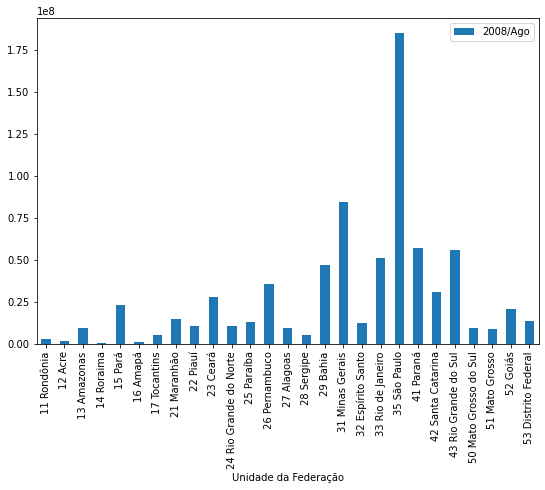

In [ ]:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))
